### Strategies for Training and and Evaluation, Metrics used in ML


In order to test our ML methods we divide our dataset into 3 seperate portions training set, validation set and testing set.Training set is what we feed to the model in order for it to learn to solve the problem at hand.

Hyper-parameters are special variables that can be used to control the learning process. These are not learnt during the training stage but are often tweaked based on the performance of the algorithm on another dataset called the validation set.

Testing set is finally used to evaluate the performance of the model on unseen data.Unlike validation which does contribute indirectly to the training of the algorithm,testing is unseen and hence is used to compare the algorithm's performance with other algorithms or training paradigms.

Common convention suggests the division of training,validation and test set in the ratio 7:1:2.But this ratio is flexible and highly depends on the problem at hand.


We also need metrics to evaluate our algorithms and some of the common ones are :
<ul>
<li>Accuracy</li>
<li>Precision</li>
<li>Recall</li>
<li>F1-score</li>
<li>AUC score </li>
</ul>

Before looking into the metrics let's see the concept of confusion matrix.It's matrix that allows us to visualize the performance of the model in a tabular format and many of the above scores can be derived from it.
In supervised learning for a binary classification problem confusion matrix can be seen as 




<table align='center'>
  <tr>
    <th></th>
    <th>Predicted Positive</th>
    <th>Predicted Negative</th>
  </tr>
  <tr>
    <td><b>Actual Positive</b></td>
    <td>True Positive(TP)</td>
    <td>False Negative(FN)</td>
  </tr>
  <tr>
    <td><b>Actual Negative</b></td>
    <td>False Positive(FP)</td>
    <td>True Negative(TN)</td>
  </tr>
</table>


The scores can now be represented as constituents of the elements of Confusion matrix.

The formula for the different scores are:

In [158]:
%%latex
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$
$$Precision = \frac{TP}{TP+FP}$$
$$Recall = \frac{TP}{TP+FN}$$
$$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$$

<IPython.core.display.Latex object>

AUC score is calculated as the Area Under the Sensitivity(TPR)-(1-Specificity)$(FPR) Curve.

In [160]:
%%latex
$$Sensitivity = Recall = \frac{TP}{TP+FN}$$
$$Specificity = \frac{TN}{FP+TN}$$


<IPython.core.display.Latex object>

### Overview of open-source datasets



Training Machine Learning algorithms requires data.The entire process involving collection,curation and labelling if any of the datasets requires a lot of resources.Fortunately, we have open-sources where such datasets are made available under minimal licensing.
<br>
Some dataset aggregators are :
<ul>
<li><a href = "https://archive.ics.uci.edu">UCI Machine Learning Repository</a></li>
<li><a href = "https://www.kaggle.com/">Kaggle</a></li>
<li><a href = "https://www.openml.org/">OpenML</a></li>
</ul> 


We will be using MNIST dataset for the following ML algorithms.MNIST is a dataset of handwritten digits ranging from 0-9.Each digit is represented as a pixel image of 28x28 dimension.The dataset contains vectorized representation of the said image as 784 dimensional vector. To work with this dataset we will Scikit-learn to fetch it from openml.

In [140]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score


In [ ]:
X,y = datasets.fetch_openml("mnist_784", version=1, return_X_y=True,as_frame=True)

Lets visualize some of the digits

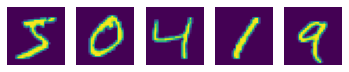

In [108]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.imshow(X.loc[i].values.reshape(28,28))

In [110]:
#Another thing we can check is whether there is class imbalance among the digits which we can see there is some
#but they are very close in frequency so we don't need to take imbalance into consideration.
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [ ]:
# Lets divide our dataset into train and test with a split of 0.8 and 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Question : We saw how our dataset is made of digits represented as a 784 dimensional vector.Can we somehow reduce the dimension and how will that affect the classification performance among different models?(Hint : PCA) 

In [126]:
%%latex
### Naive Bayes Classifier
Naive Bayes Classifier is based on Bayes' theorem where we assume conditional independence among the different pair features given the value of the class label.Given the class label y and features $x_{1}$ through $x_{n}$
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)}{P(x_1, \dots, x_n)}$$

As we assume them to be conditionally independent hence we can say
$$P(x_1, \dots, x_n \mid y) = \prod_{i=1}^{n} P(x_i \mid y)$$

Also as $P(x_1, \dots, x_n)$ also called evidence, works as a scaling factor to make the probabilites sum up to 1 hence we can remove it to get
$$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}$$

Reference: <a href="https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes"> Naive Bayes scikit-learn </a>

<IPython.core.display.Latex object>

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [144]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("The classification accuracy, f1-score, precision and recall were",f'{accuracy_score(y_test,y_pred):.2f},',f'{f1_score(y_test,y_pred,average="weighted"):.2f},',f'{precision_score(y_test,y_pred,average="weighted"):.2f}',"and",f'{recall_score(y_test,y_pred,average="weighted"):.2f}')

The classification accuracy, f1-score, precision and recall were 0.55, 0.51, 0.68 and 0.55


In [145]:
mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print("The classification accuracy, f1-score, precision and recall were",f'{accuracy_score(y_test,y_pred):.2f},',f'{f1_score(y_test,y_pred,average="weighted"):.2f},',f'{precision_score(y_test,y_pred,average="weighted"):.2f}',"and",f'{recall_score(y_test,y_pred,average="weighted"):.2f}')

The classification accuracy, f1-score, precision and recall were 0.82, 0.82, 0.83 and 0.82


In [146]:
bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)
print("The classification accuracy, f1-score, precision and recall were",f'{accuracy_score(y_test,y_pred):.2f},',f'{f1_score(y_test,y_pred,average="weighted"):.2f},',f'{precision_score(y_test,y_pred,average="weighted"):.2f}',"and",f'{recall_score(y_test,y_pred,average="weighted"):.2f}')

The classification accuracy, f1-score, precision and recall were 0.83, 0.83, 0.83 and 0.83


### Ensemble Methods 
Meta Learning approach which involves combining multiple base models to get better predictive accuracy.They can be classified into two main categories bootstrap aggregation(bagging) and boosting.


#### Bootstrap Aggregation
Involves training multiple weak classifiers on bootstrapped data sets,i.e. selecting from training data set with replacement,and voting over the weak classifiers for final prediction.A simple example would be that of Random Forest


##### Random Forest

Random Forest is a meta ML algorithm which uses the concept of bagging by training multiple decision trees as weak classifiers over bootstrapped data sets from the training data.This kind of bootstrapping allows the decision trees which are trained to be uncorrelated hence reducing the variance of the model.The final prediction is done using a majority vote among the different decision trees.

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1)
y_pred = rfc.fit(X_train, y_train).predict(X_test)
print("The classification accuracy, f1-score, precision and recall were",f'{accuracy_score(y_test,y_pred):.2f},',f'{f1_score(y_test,y_pred,average="weighted"):.2f},',f'{precision_score(y_test,y_pred,average="weighted"):.2f}',"and",f'{recall_score(y_test,y_pred,average="weighted"):.2f}')

The classification accuracy, f1-score, precision and recall were 0.97, 0.97, 0.97 and 0.97


#### Boosting
Boosting involves training successive models each new model emphasising more on the misclassified samples of the previous one.Unlike in bagging boosting can be done across different base classifiers.Some examples we will consider here are AdaBoost and Xgboost.


##### AdaBoost

AdaBoost is a boosting algorithm that combines several weak classifiers into a single strong classifier. It operates by iteratively training weak classifiers on data and modifying instance weights based on classification errors. A weighted vote of the weak classifiers is used to make the final prediction.

In [149]:
from sklearn.ensemble import AdaBoostClassifier

In [150]:
ada = AdaBoostClassifier(n_estimators=100,n_jobs=-1)
y_pred = ada.fit(X_train, y_train).predict(X_test)
print("The classification accuracy, f1-score, precision and recall were",f'{accuracy_score(y_test,y_pred):.2f},',f'{f1_score(y_test,y_pred,average="weighted"):.2f},',f'{precision_score(y_test,y_pred,average="weighted"):.2f}',"and",f'{recall_score(y_test,y_pred,average="weighted"):.2f}')

The classification accuracy, f1-score, precision and recall were 0.74, 0.74, 0.74 and 0.74


##### XgBoost

XgBoost or eXtreme Gradient Boost is a software library that implements the Gradient Boosting algorithm with multiple hardware optimizations and regularization.

In [151]:
!pip install xgboost
from xgboost import XGBClassifier

In [161]:
xgc = XGBClassifier(n_estimators=100,n_jobs=-1)
y_pred = ada.fit(X_train, y_train).predict(X_test)
print("The classification accuracy, f1-score, precision and recall were",f'{accuracy_score(y_test,y_pred):.2f},',f'{f1_score(y_test,y_pred,average="weighted"):.2f},',f'{precision_score(y_test,y_pred,average="weighted"):.2f}',"and",f'{recall_score(y_test,y_pred,average="weighted"):.2f}')

The classification accuracy, f1-score, precision and recall were 0.74, 0.74, 0.74 and 0.74


#### Artificial Neural Networks



Artificial neural networks are combination of non linear logistic units that are capable of outperforming classical machine learning algorithms due to their ability to learn complex feature relationships in the dataset.

In [153]:
from sklearn.neural_network import MLPClassifier

In [154]:
# Input 784 - hidden layer 100 -  Output 10
clf = MLPClassifier(hidden_layer_sizes=(100,)random_state=1, max_iter=300)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("The classification accuracy, f1-score, precision and recall were",f'{accuracy_score(y_test,y_pred):.2f},',f'{f1_score(y_test,y_pred,average="weighted"):.2f},',f'{precision_score(y_test,y_pred,average="weighted"):.2f}',"and",f'{recall_score(y_test,y_pred,average="weighted"):.2f}')

The classification accuracy, f1-score, precision and recall were 0.96, 0.96, 0.96 and 0.96
